In [40]:
import numpy as np
import pandas as pd

In [41]:
data = pd.read_csv("C:\\Users\\Saeid\\OneDrive\\\Desktop\\dataset\\data.txt")
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
X=data.values[:, 1:]
y=data.values[:, 0]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [44]:
# bakhshe intekhabe vijhi.
from sklearn.base import clone
from itertools import combinations 
from sklearn.metrics import accuracy_score

In [46]:
class SBS():# کلاس یرای توسعه فرایند فیچر 
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        # estimator فیچر های که بیشترین تاثیر گذاری رو دارن
                #scoring=accuracy  ارزیابی دقت پیش بینی مدل ما چقدر است
               #ranodam رکرود ها چطوری اختصاص پیدا کنه
                #kتا k ،تا بررسی میکنه
                     
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
        
    def fit(self, X, y):
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,random_state=self.random_state)
        #پارتیشن بندی واسه ماشین لریتگ برای شناسایی فیچر های مناسب

        dim = X_train.shape[1]#نشان دهنده بعد ماتریس که الان با یک کار داره
        self.indices_ = tuple(range(dim))#تعداد فیجرها بصورت تاپل در نظر میگیره
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:                 
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [54]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)

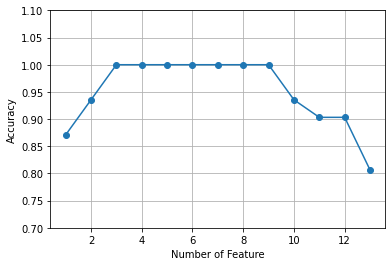

In [48]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Feature')
plt.grid()
plt.show()



In [49]:
k5 = list(sbs.subsets_[8])
print(data.columns[1:][k5])

Index(['B', 'C', 'D', 'G', 'K'], dtype='object')


In [50]:
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.8790322580645161
Test accuracy: 0.6666666666666666


In [51]:
knn.fit(X_train[:, k5], y_train)
print('Training accuracy:', knn.score(X_train[:, k5], y_train))
print('Test accuracy:', knn.score(X_test[:, k5], y_test))

Training accuracy: 0.9354838709677419
Test accuracy: 0.8888888888888888


In [52]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = data.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1) 
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) B                              0.182483
 2) C                              0.158610
 3) D                              0.150948
 4) E                              0.131987
 5) F                              0.106589
 6) G                              0.078243
 7) H                              0.060718
 8) I                              0.032033
 9) J                              0.025400
10) K                              0.022351
11) L                              0.022078
12) M                              0.014645
13) N                              0.013916


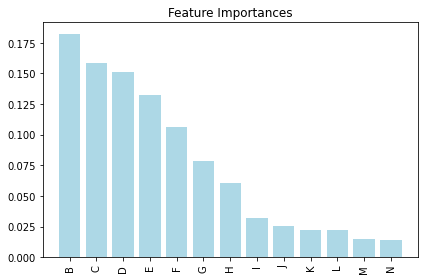

In [53]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)                                    
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()